# Raiffeisen - EDA

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools

pd.options.display.max_columns = 400

In [3]:
def barplot_by(df, column, figsize=(30, 10), rotation=90):

    fig, axs = plt.subplots(2, 1, figsize=figsize)

    plt0 = sns.barplot(df[column], df['CL_FLG_EVER'], ax=axs[0])
    plt1 = sns.barplot(df[column], df['CL_FLG_m1'], ax=axs[1])

    plt0.set_xticklabels(plt0.get_xticklabels(), rotation=rotation)
    plt1.set_xticklabels(plt1.get_xticklabels(), rotation=rotation)

    plt.tight_layout()

## Load data

In [5]:
df = pd.read_csv('RFB - Clean Data.csv', index_col=0)

/usr/local/lib/python3.5/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [6]:
df.head()

,PD_MIX_ACTIVE_m1,BLACK_LIST_FLG_m1,BLACK_LIST_LEVEL_m1,LEASING_FLG_m1,RISK_BLOCKED_FLG_m1,CUSTOMER_RK,CC_DB_TXN_CNT_m1,CC_DB_TXN_AMT_m1,CC_CR_TXN_CNT_m1,CC_CR_TXN_AMT_m1,CC_EOM_BAL_AMT_m1,CC_AVG_BAL_AMT_m1,CC_ACC_USED_CNT_m1,CL_DB_TXN_CNT_m1,CL_DB_TXN_AMT_m1,CL_CR_TXN_CNT_m1,CL_CR_TXN_AMT_m1,CL_EOM_BAL_AMT_m1,CL_AVG_BAL_AMT_m1,CL_ACC_USED_CNT_m1,LEN_DB_TXN_CNT_m1,LEN_DB_TXN_AMT_m1,LEN_CR_TXN_CNT_m1,LEN_CR_TXN_AMT_m1,LEN_EOM_BAL_AMT_m1,LEN_AVG_BAL_AMT_m1,LEN_ACC_USED_CNT_m1,LM_DB_TXN_CNT_m1,LM_DB_TXN_AMT_m1,LM_CR_TXN_CNT_m1,LM_CR_TXN_AMT_m1,LM_EOM_BAL_AMT_m1,LM_AVG_BAL_AMT_m1,LM_ACC_USED_CNT_m1,SA_DB_TXN_CNT_m1,SA_DB_TXN_AMT_m1,SA_CR_TXN_CNT_m1,SA_CR_TXN_AMT_m1,SA_EOM_BAL_AMT_m1,SA_AVG_BAL_AMT_m1,SA_ACC_USED_CNT_m1,SLA_DB_TXN_CNT_m1,SLA_DB_TXN_AMT_m1,SLA_CR_TXN_CNT_m1,SLA_CR_TXN_AMT_m1,SLA_EOM_BAL_AMT_m1,SLA_AVG_BAL_AMT_m1,SLA_ACC_USED_CNT_m1,TD_DB_TXN_CNT_m1,TD_DB_TXN_AMT_m1,TD_CR_TXN_CNT_m1,TD_CR_TXN_AMT_m1,TD_EOM_BAL_AMT_m1,TD_AVG_BAL_AMT_m1,TD_ACC_USED_CNT_m1,SSP_FLG_m1,PAST_DUE_AMT_m1,OD_LIMIT_m1,DAYS_PAST_DUE_m1,INCOME_AMT_m1,SLA_INCOME_AMT_m1,DEBIT_CARD_CNT_m1,NOSTRO_TXN_AMT_m1,LORO_TXN_AMT_m1,CHEQUE_TXN_CNT_m1,CHEQUE_TXN_AMT_m1,MRCH_AIR_TXN_CNT_m1,MRCH_AIR_TXN_AMT_m1,MRCH_CASH_TXN_CNT_m1,MRCH_CASH_TXN_AMT_m1,MRCH_CHILD_TXN_CNT_m1,MRCH_CHILD_TXN_AMT_m1,MRCH_CLTH_TXN_CNT_m1,MRCH_CLTH_TXN_AMT_m1,MRCH_DEPST_TXN_CNT_m1,MRCH_DEPST_TXN_AMT_m1,MRCH_DIY_TXN_CNT_m1,MRCH_DIY_TXN_AMT_m1,MRCH_DRCTM_TXN_CNT_m1,MRCH_DRCTM_TXN_AMT_m1,MRCH_ENT_TXN_CNT_m1,MRCH_ENT_TXN_AMT_m1,MRCH_FOOD_TXN_CNT_m1,MRCH_FOOD_TXN_AMT_m1,MRCH_HTL_TXN_CNT_m1,MRCH_HTL_TXN_AMT_m1,MRCH_LGS_TXN_CNT_m1,MRCH_LGS_TXN_AMT_m1,MRCH_MED_TXN_CNT_m1,MRCH_MED_TXN_AMT_m1,MRCH_MOT_TXN_CNT_m1,MRCH_MOT_TXN_AMT_m1,MRCH_MSCS_TXN_CNT_m1,MRCH_MSCS_TXN_AMT_m1,MRCH_PET_TXN_CNT_m1,MRCH_PET_TXN_AMT_m1,MRCH_RNTC_TXN_CNT_m1,MRCH_RNTC_TXN_AMT_m1,MRCH_SRV_TXN_CNT_m1,MRCH_SRV_TXN_AMT_m1,MRCH_TRV_TXN_CNT_m1,MRCH_TRV_TXN_AMT_m1,RUBR_CD_TXN_CNT_m1,RUBR_CD_TXN_AMT_m1,RUBR_CI_TXN_CNT_m1,RUBR_CI_TXN_AMT_m1,RUBR_CU_TXN_CNT_m1,RUBR_CU_TXN_AMT_m1,RUBR_PD_TXN_CNT_m1,RUBR_PD_TXN_AMT_m1,RUBR_PI_TXN_CNT_m1,RUBR_PI_TXN_AMT_m1,RUBR_PU_TXN_CNT_m1,RUBR_PU_TXN_AMT_m1,CH_CALLC_TXN_CNT_m1,CH_CALLC_TXN_AMT_m1,CH_ATM_TXN_CNT_m1,CH_ATM_TXN_AMT_m1,CH_INT_TXN_CNT_m1,CH_INT_TXN_AMT_m1,CH_SMS_TXN_CNT_m1,CH_SMS_TXN_AMT_m1,CH_BRN_TXN_CNT_m1,CH_BRN_TXN_AMT_m1,CH_DIRM_TXN_CNT_m1,CH_DIRM_TXN_AMT_m1,CH_POS_TXN_CNT_m1,CH_POS_TXN_AMT_m1,CC_TOT_TXN_CNT_m1,CC_TOT_TXN_AMT_m1,CL_TOT_TXN_CNT_m1,CL_TOT_TXN_AMT_m1,LEN_TOT_TXN_CNT_m1,LEN_TOT_TXN_AMT_m1,LM_TOT_TXN_CNT_m1,LM_TOT_TXN_AMT_m1,SA_TOT_TXN_CNT_m1,SA_TOT_TXN_AMT_m1,SLA_TOT_TXN_CNT_m1,SLA_TOT_TXN_AMT_m1,TD_TOT_TXN_CNT_m1,TD_TOT_TXN_AMT_m1,TOT_DB_TXN_CNT_m1,TOT_DB_TXN_AMT_m1,TOT_CR_TXN_CNT_m1,TOT_CR_TXN_AMT_m1,FIRST_OPEN_PRODUCT,FIRST_CLOSED_PRODUCT_6MTH,LAST_OPEN_PRODUCT,LAST_CLOSED_PRODUCT,ACCT_OPENED_CNT,ACCT_CLOSED_CNT,EARLY_REPAYMENT_LTD_FLG,ACCT_DEP_LTD_CNT,ACCT_CRE_LTD_CNT,CCREV_FLG_EVER,CCREV_FLG,CCWEB_FLG_EVER,CCWEB_FLG,DC_FLG_EVER,DC_FLG,OD_FLG_EVER,OD_FLG,ROL_FLG_EVER,SLA_FLG_EVER,SLA_FLG,CC_ACCT_OPENED_CNT,CC_ACCT_CLOSED_CNT,CC_MAX_TENURE_MTH,CC_MIN_TENURE_MTH,CC_MTH_SINCE_LAST_OPEN,CC_FLG_EVER,CC_FLG_m1,CC_ACCT_CNT_m1,CC_ACCT_OPEN_CNT_m1,CC_ACCT_CLOSE_CNT_m1,CL_ACCT_OPENED_CNT,CL_ACCT_CLOSED_CNT,CL_MATURITY_MTH,CL_MAX_TENURE_MTH,CL_MIN_TENURE_MTH,CL_MTH_SINCE_LAST_OPEN,CL_FLG_EVER,CL_FLG_m1,CL_ACCT_CNT_m1,CL_ACCT_OPEN_CNT_m1,CL_ACCT_CLOSE_CNT_m1,LEN_ACCT_OPENED_CNT,LEN_ACCT_CLOSED_CNT,LEN_MATURITY_MTH,LEN_MAX_TENURE_MTH,LEN_MIN_TENURE_MTH,LEN_MTH_SINCE_LAST_OPEN,LEN_FLG_EVER,LEN_FLG_m1,LEN_ACCT_CNT_m1,LEN_ACCT_OPEN_CNT_m1,LEN_ACCT_CLOSE_CNT_m1,LM_ACCT_OPENED_CNT,LM_ACCT_CLOSED_CNT,LM_MATURITY_MTH,LM_MAX_TENURE_MTH,LM_MIN_TENURE_MTH,LM_MTH_SINCE_LAST_OPEN,LM_FLG_EVER,LM_FLG_m1,LM_ACCT_CNT_m1,LM_ACCT_OPEN_CNT_m1,LM_ACCT_CLOSE_CNT_m1,SA_ACCT_OPENED_CNT,SA_ACCT_CLOSED_CNT,SA_MAX_TENURE_MTH,SA_MIN_TENURE_MTH,SA_MTH_SINCE_LAST_OPEN,SA_FLG_EVER,SA_FLG_m1,SA_ACCT_CNT_m1,SA_ACCT_OPEN_CNT_m1,SA_ACCT_CLOSE_CNT_m1,SLA_ACCT_OPENED_CNT,SLA_ACCT_CLOSED_CNT,SLA_MAX_TENURE_MTH,SL

## Product trends

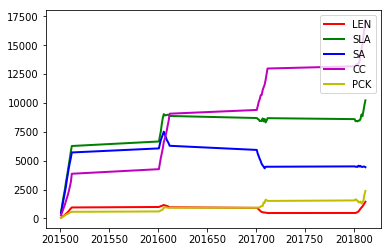

In [8]:
colors = itertools.cycle('rgbmyck')
fig, ax = plt.subplots()
for product, color in zip(df.FIRST_OPEN_PRODUCT.unique()[:5].tolist(), colors):
    x = df[df.FIRST_OPEN_PRODUCT==product].groupby('month').agg({'FIRST_OPEN_PRODUCT':'count'}).sort_values(by=['month'], ascending=True).index.values
    y = df[df.FIRST_OPEN_PRODUCT==product].groupby('month').agg({'FIRST_OPEN_PRODUCT':'count'}).sort_values(by=['month'], ascending=True).FIRST_OPEN_PRODUCT
    ax.plot(x, y, '-', linewidth=2, c=color)
legend = ax.legend(df.FIRST_OPEN_PRODUCT.unique()[:5].tolist(), loc='upper right')

In [9]:
df_trending_series = df[df.CC_FLG_EVER==1].sort_values(['FIRST_OPEN_PRODUCT', 'month'], ascending=[True, True])
df_trending_group = df_trending_series.groupby(['FIRST_OPEN_PRODUCT', 'month']).agg({'CL_ACCT_OPENED_CNT': 'sum'})
df_trending = df_trending_group.groupby('FIRST_OPEN_PRODUCT').agg({'CL_ACCT_OPENED_CNT': lambda x: np.polyfit([i[1] for i in x.index], x.values, 1)[0]}).sort_values('CL_ACCT_OPENED_CNT', ascending=False)

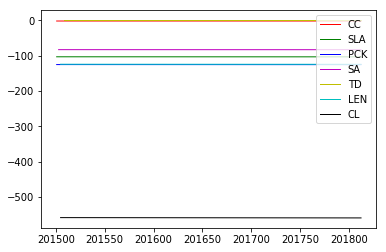

In [10]:
colors = itertools.cycle('rgbmyck')
fig, ax = plt.subplots()
for product, color in zip(df_trending.index.tolist(), colors):
    x = df_trending_series[df_trending_series.FIRST_OPEN_PRODUCT == product].month
    y = df_trending_series[df_trending_series.FIRST_OPEN_PRODUCT == product].CL_ACCT_OPENED_CNT
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x)-z[1], '-', linewidth=1, c=color)
legend = ax.legend(df_trending.index.tolist(), loc='upper right')

## Cache Loan

In [11]:
ds = df[df.DAYS_SINCE_FIRST_ACCOUNT_OPEN<180]

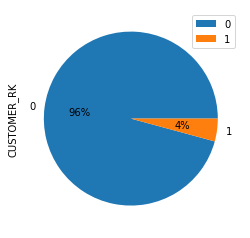

In [12]:
ds.groupby('CL_FLG_EVER').agg({'CUSTOMER_RK':'count'}).plot.pie(y='CUSTOMER_RK', autopct='%1.0f%%')

In [ ]:
barplot_by(df, 'PD_MIX_ACTIVE_m1')

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))

plt0 = sns.distplot(df.INCOME_AMT_m1, ax=axs[0])
plt1 = sns.distplot(df.SLA_INCOME_AMT_m1, ax=axs[1])

plt0.set_xscale('log')
plt1.set_yscale('log')

plt.show()

In [ ]:
city = df.groupby('CITY').agg({'CUSTOMER_RK':'count'}).sort_values('CUSTOMER_RK', ascending=False).head(10).reset_index()
region = df.groupby('REGION_CD').agg({'CUSTOMER_RK':'count'}).sort_values('CUSTOMER_RK', ascending=False).head(10).reset_index()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].pie(city['CUSTOMER_RK'], labels=city['CITY'], autopct='%1.0f%%')
axs[1].pie(region['CUSTOMER_RK'], labels=region['REGION_CD'], autopct='%1.0f%%')

axs[0].set_title('City')
axs[1].set_title('Region')

plt.show()

In [ ]:
matstat = df.groupby('MARITAL_STATUS').agg({'CUSTOMER_RK':'count'}).sort_values('CUSTOMER_RK', ascending=False).head(5).reset_index()
edlevel = df.groupby('Education_level').agg({'CUSTOMER_RK':'count'}).sort_values('CUSTOMER_RK', ascending=False).head(5).reset_index()
resstat = df.groupby('RESIDENCE_STATUS').agg({'CUSTOMER_RK':'count'}).sort_values('CUSTOMER_RK', ascending=False).head(4).reset_index()
emptype = df.groupby('EMPLOYMENT_TYPE').agg({'CUSTOMER_RK':'count'}).sort_values('CUSTOMER_RK', ascending=False).head(6).reset_index()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

axs[0][0].pie(matstat['CUSTOMER_RK'], labels=matstat['MARITAL_STATUS'], autopct='%1.0f%%')
axs[0][1].pie(edlevel['CUSTOMER_RK'], labels=edlevel['Education_level'], autopct='%1.0f%%')
axs[1][0].pie(resstat['CUSTOMER_RK'], labels=resstat['RESIDENCE_STATUS'], autopct='%1.0f%%')
axs[1][1].pie(emptype['CUSTOMER_RK'], labels=emptype['EMPLOYMENT_TYPE'], autopct='%1.0f%%')

axs[0][0].set_title('Marital status')
axs[0][1].set_title('Education level')
axs[1][0].set_title('Residense status')
axs[1][1].set_title('Employment status')

plt.show()